In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_df=pd.read_csv(clinical_trial_data)
mouse_df=pd.read_csv(mouse_drug_data)
# Combine the data into a single dataset
merged_df=pd.merge(trial_df, mouse_df, on='Mouse ID', how='outer')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [39]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merged_df.groupby("Drug")["Timepoint"].count()
tumor_res = merged_df.groupby(["Drug","Timepoint"])
# Convert to DataFrame
tumor_df=tumor_res["Tumor Volume (mm3)"].mean().to_frame()
# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [40]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_gb=merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
error_df = error_gb.to_frame()
# Preview DataFrame
error_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [41]:
# Minor Data Munging to Re-Format the Data Frames
tumor_plot = tumor_df.unstack(0)
tumorplot_df=tumor_plot["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumorplot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


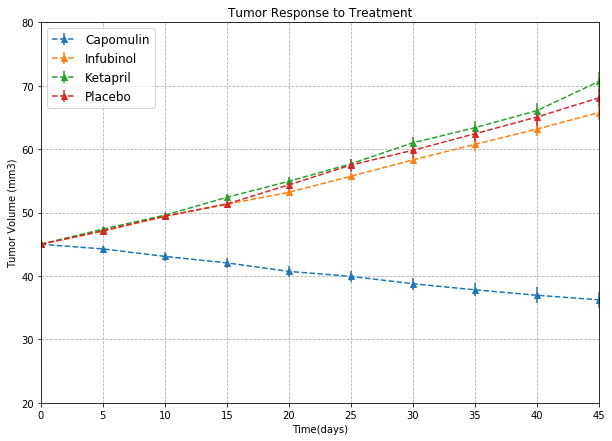

In [48]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit=45
plt.figure(figsize=(10,7))
error = error_df["Tumor Volume (mm3)"]["Capomulin"]
cap=plt.errorbar(x_axis, tumorplot_df["Capomulin"],yerr=error, fmt="^",ls="dashed")
error = error_df["Tumor Volume (mm3)"]["Infubinol"]
infu=plt.errorbar(x_axis, tumorplot_df["Infubinol"], yerr=error, fmt="^",ls="dashed")
error=error_df["Tumor Volume (mm3)"]["Ketapril"]
keta=plt.errorbar(x_axis, tumorplot_df["Ketapril"],yerr=error, fmt="^",ls="dashed")
error=error_df["Tumor Volume (mm3)"]["Placebo"]
plac=plt.errorbar(x_axis,tumorplot_df["Placebo"], yerr=error, fmt="^",ls="dashed")
plt.ylim(20,80)
plt.xlim(0,45)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac),("Capomulin", "Infubinol", "Ketapril","Placebo"), fontsize=12)
plt.show()

In [44]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [49]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merged_df.groupby("Drug")["Timepoint"].count()
meta=merged_df.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
meta_df=meta["Metastatic Sites"].mean().to_frame()
# Preview DataFrame
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [50]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sterr=merged_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
mse_df=meta_sterr.to_frame()
# Preview DataFrame
mse_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [52]:
# Minor Data Munging to Re-Format the Data Frames
meta_plot=meta_df.unstack(0)
meta_plot_df=meta_plot["Metastatic Sites"]
# Preview that Reformatting worked
meta_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


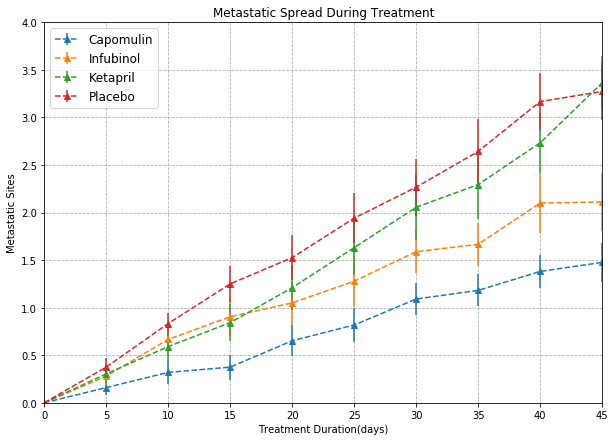

In [54]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))
plot=mse_df["Metastatic Sites"]["Capomulin"]
cap2=plt.errorbar(x_axis, meta_plot_df["Capomulin"], yerr=plot, fmt="^", ls="dashed")
plot=mse_df["Metastatic Sites"]["Infubinol"]
infu2=plt.errorbar(x_axis, meta_plot_df["Infubinol"], yerr=plot, fmt="^", ls="dashed")
plot=mse_df["Metastatic Sites"]["Ketapril"]
keta2=plt.errorbar(x_axis, meta_plot_df["Ketapril"], yerr=plot, fmt="^", ls="dashed")
plot=mse_df["Metastatic Sites"]["Placebo"]
plac2=plt.errorbar(x_axis, meta_plot_df["Placebo"], yerr=plot, fmt="^", ls="dashed")
plt.ylim(0,4)
plt.xlim(0,45)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(days)")
plt.ylabel("Metastatic Sites")
plt.grid(linestyle="dashed")
plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
# Save the Figure
plt.savefig('Metastatic_Spread.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [59]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice=merged_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
mouse_count=mice.to_frame()
mouse_count=mouse_count.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [60]:
# Minor Data Munging to Re-Format the Data Frames
mouse_plot=mouse_count.unstack(0)
mouse_df=mouse_plot["Mouse Count"]
# Preview the Data Frame
mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


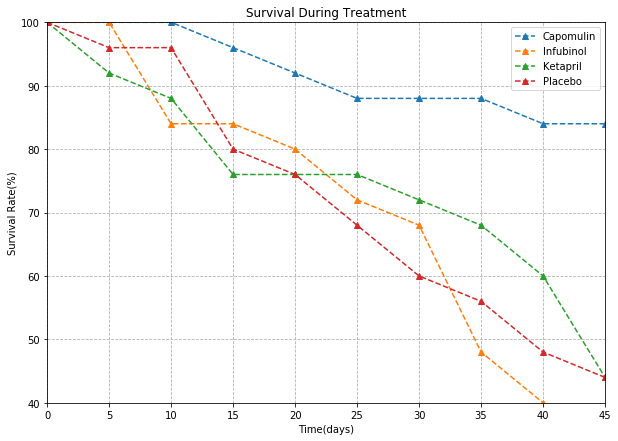

In [61]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,7))
cap3=plt.errorbar(x_axis,(mouse_df["Capomulin"]/25*100), fmt="^", ls="dashed")
infu3=plt.errorbar(x_axis,(mouse_df["Infubinol"]/25*100), fmt="^", ls="dashed")
keta3=plt.errorbar(x_axis,(mouse_df["Ketapril"]/25*100), fmt="^", ls="dashed")
plac3=plt.errorbar(x_axis,(mouse_df["Placebo"]/25*100),fmt="^", ls="dashed")
plt.ylim(40,100)
plt.xlim(0,45)
plt.title("Survival During Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Survival Rate(%)")
plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3),("Capomulin", "Infubinol", "Ketapril", "Placebo"))
# Save the Figure
plt.savefig("Survival_During_Treatment")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [64]:
# Calculate the percent changes for each drug
cap_change = ((tumorplot_df["Capomulin"][45] - tumorplot_df["Capomulin"][0])/45)*100
ceft_change = ((tumorplot_df["Ceftamin"][45] - tumorplot_df["Ceftamin"][0])/45)*100
infu_change = ((tumorplot_df["Infubinol"][45] - tumorplot_df["Infubinol"][0])/45)*100
keta_change = ((tumorplot_df["Ketapril"][45] - tumorplot_df["Ketapril"][0])/45)*100
naft_change = ((tumorplot_df["Naftisol"][45] - tumorplot_df["Naftisol"][0])/45)*100
plac_change = ((tumorplot_df["Placebo"][45] - tumorplot_df["Placebo"][0])/45)*100
prop_change = ((tumorplot_df["Propriva"][45] - tumorplot_df["Propriva"][0])/45)*100
rami_change = ((tumorplot_df["Ramicane"][45] - tumorplot_df["Ramicane"][0])/45)*100
stel_change = ((tumorplot_df["Stelasyn"][45] - tumorplot_df["Stelasyn"][0])/45)*100
zoni_change = ((tumorplot_df["Zoniferol"][45] - tumorplot_df["Zoniferol"][0])/45)*100

drugchange_df = pd.DataFrame({"Drug": ["Capomulin","Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo","Propiva","Ramicane","Stelasyn","Zoniferol"],
                               "Percent Change": [cap_change,ceft_change, infu_change, keta_change, naft_change, plac_change,prop_change,rami_change,stel_change,zoni_change]
                              })
# Display the data to confirm
drugchange_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propiva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

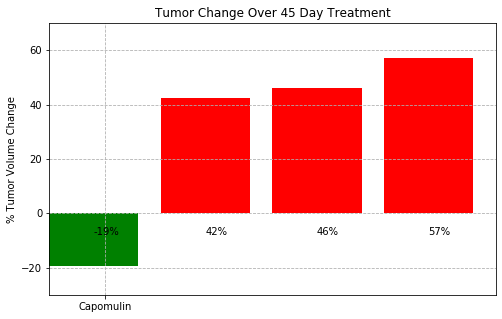

In [66]:
# Store all Relevant Percent Changes into a Tuple
tup1=("Capomulin","Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo","Propiva","Ramicane","Stelasyn","Zoniferol")
tup2=(cap_change,ceft_change, infu_change, keta_change, naft_change, plac_change,prop_change,rami_change,stel_change,zoni_change)

# Splice the data between passing and failing drugs
plt.figure(figsize=(8,5))
rects1=plt.bar(0,drugchange_df["Percent Change"][0], color='g', align="edge")
rects2=plt.bar(1, drugchange_df["Percent Change"][1], color='r',align="edge")
rects3=plt.bar(2, drugchange_df["Percent Change"][2], color='r', align="edge")
rects4=plt.bar(3, drugchange_df["Percent Change"][3], color='r', align="edge")

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drugchange_df["Drug"])
plt.xlim(0,4)
plt.ylim(-30,70)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height= rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.,-8,'%d' % int(height)+"%")
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
# Call functions to implement the function calls


# Save the Figure


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)